# 21. 편미방_Heat

In [15]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=4)

$$\frac {\partial^2 u} {\partial x^2} = \frac {\partial u} {\partial t}$$
### 21.1 함수값 경계 조건 및 초기 조건
$$u(0,t)=0,\;\;u(\pi,t)=0,\;\;u(x,0)=100$$

- 풀이 구간 분할 및 time step 설정

In [31]:
c = 1

x = np.linspace(0, np.pi, 21)
h = x[1] - x[0]

tf = 0.8
n_time = 80
k = tf/n_time

lam = c*k/h**2
print(lam)

0.40528473456935116


- u에 초기값과 경계조건 부여

In [34]:
u = np.full(x.shape, 100)
u[0] = 0; u[-1] = 0

u_next = np.zeros(u.shape)

- Finite difference 식에 따른 계산

In [37]:
t = 0

for it in range(0, n_time):
    t += k
    for ix in range(1, len(x)-1):
        u_next[ix] = lam * u[ix-1] + (1-2*lam) * u[ix] + lam * u[ix+1]
    u = np.copy(u_next)

print(t)
print(u)

0.8000000000000005
[ 0.      8.9217 17.6215 25.8834 33.5031 40.2932 46.0876 50.7457 54.155
 56.2338 56.9322 56.2338 54.155  50.7457 46.0876 40.2932 33.5031 25.8834
 17.6215  8.9217  0.    ]


- 이론해 계산

In [40]:
u_exact = np.zeros(u.shape)
for n in range(1,20,2):
    u_exact += 400/(np.pi*n) * np.exp(-(n**2) * tf) * np.sin(n*x)

- 결과 비교

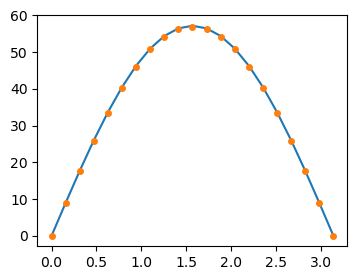

In [45]:
plt.figure(figsize = (4,3))
plt.plot(x, u_exact)
plt.plot(x, u, "o", ms=4)
plt.show()

### 21.2 도함수값 경계 조건 및 초기 조건
$$u(0,t)=0,\;\;\frac {\partial u}{\partial x} (\pi,t) =0,\;\;u(x,0)=100$$
- 풀이 구간 설정 및 분할

In [57]:
c = 1

x = np.linspace(0, np.pi, 21)
h = x[1] - x[0]

tf = 0.8
n_time = 80
k = tf/n_time

lam = c*k/h**2
print(lam)

0.40528473456935116


- u에 초기값과 경계조건 부여

In [59]:
u = np.full(x.shape, 100)
u[0] = 0

u_next = np.zeros(u.shape)

- Finite difference 식에 따른 계산

In [62]:
t = 0

for it in range(0, n_time):
    t += k
    for ix in range(1, len(x)):
        if ix == len(x)-1:
            u_next[ix] = 2*lam * u[ix-1] + (1-2*lam) * u[ix]
        else:
            u_next[ix] = lam * u[ix-1] + (1-2*lam) * u[ix] + lam * u[ix+1]
    u = np.copy(u_next)

print(t)
print(u)

0.8000000000000005
[ 0.      9.8434 19.5383 28.9429 37.9281 46.3828 54.2177 61.3679 67.7936
 73.4794 78.4321 82.6778 86.2576 89.2234 91.6331 93.5467 95.0215 96.1094
 96.8538 97.287  97.4291]


- 이론해 계산

In [65]:
u_exact = np.zeros(u.shape)
for n in range(1,20):
    nh = n-1/2
    u_exact += 200/(np.pi*nh) * np.exp(-(nh**2) * tf) * np.sin(nh*x)

- 결과 비교

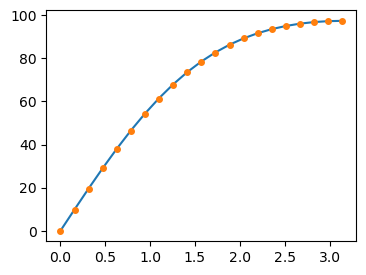

In [68]:
plt.figure(figsize = (4,3))
plt.plot(x, u_exact)
plt.plot(x, u, "o", ms=4)
plt.show()